### 1. 결정트리 개요

>__정보의 균일도__ 에 따라 계속해서 가지를 쳐 나가며 데이터를 split하는 방식<br><br> 
정보의 균일도를 판단하기 위해<br>
&nbsp;&nbsp;&nbsp;&nbsp;1) __정보이득지수__ : (1 - 엔트로피 지수) 로 판단. 엔트로피지수는 서로 다른 값이 섞여 있을수록 높음<br>
&nbsp;&nbsp;&nbsp;&nbsp;2) __지니계수__ : 경제학에서 불평등 지수를 나타낼 때 사용하는 지니계수를 계승. 0~1사이의 값을 가지며 1에 가까울수록 불평등<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> DecisionTreeClassifier가 사용하는 방식<br>

### 2. 결정트리 모델의 특징

>__장점__ : 룰이 명확하기 때문에 직관적이고 시각화 가능. 정규화나 스케일링등의 전처리 작업 불필요  
>__단점__ : 과적합으로 인해 정확도가 떨어짐

### 3. 결정트리 파라미터


> 사이킷런의 결정 트리 구현은 __CART__ 알고리즘 기반  
>  &nbsp;&nbsp;&nbsp;&nbsp;_결정트리의 알고리즘은 CART 이외에도 ID3, C5.0, CHAID등이 있음_

|파라미터명|설명|
|:------|:---|
|min_samples_split|노드를 분할하기 위한 최소 샘플 데이터수. 과적합 제어용이며 디폴트는 2|
|min_samples_leaf|말단 노드가 되기 위한 최소한의 샘플 데이터 수. 과적합 제어용|
|max_features|최적 분할을 위해 고려할 피처 갯수. 디폴트는 None으로 모든 피처를 사용한다는 의미|
|max_depth|트리의 최대 깊이 규정. 디폴트는 None으로 완벽한 클래스 결정이 될 때 까지 트리를 성장시킴 <br>단 깊이가 깊어지면 과적합 발생 가능|
|max_leaf_nodes|말단 노드의 최대 갯수 규정|

### 4. 결정트리 모델 시각화

#### 4.1 결정 트리 시각화

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

## 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)

## 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

## export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

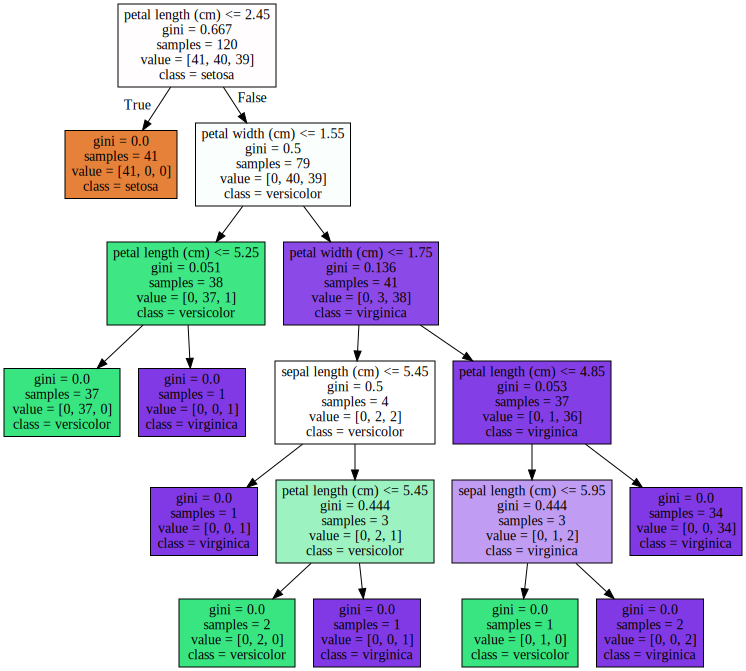

In [10]:
import graphviz
## 위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터 노트북상에서 시각화

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 4.2 피처 중요도 시각화

Feature importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm) :  0.025
sepal width (cm) :  0.000
petal length (cm) :  0.555
petal width (cm) :  0.420


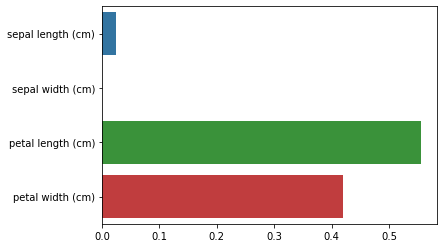

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

## feature importance 추출
print(f'Feature importances :\n{np.round(dt_clf.feature_importances_,3)}')

## feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value : .3f}')
    
## feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 5. 결정트리 과적합

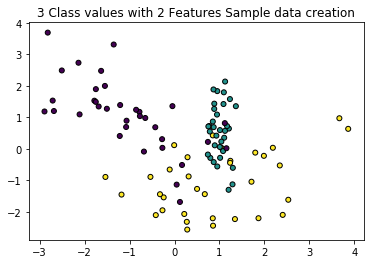

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

## 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features =2, n_redundant=0, n_informative=2,\
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

## 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

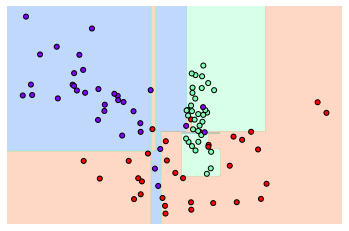

In [18]:
from sklearn.tree import DecisionTreeClassifier

## 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치 데이터를 분류하다보니 결정 경계 기준이 지나치게 많이 생김 -> __과적합 발생__

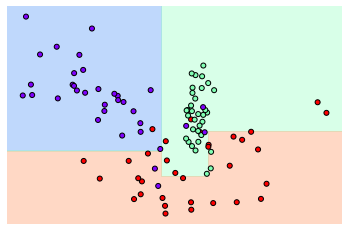

In [19]:
# 하이퍼 파라미터 추가

## min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

완화된 조건으로 좀 더 일반화된 분류규칙에 따라 분류  
이 경우 __과적합 발생확률 감소__ 하여 __테스트 데이터 세트의 정확도는 상승__ 할 확률 증가

### 6. 결정트리 실습 - 사용자 행동 인식 데이터 세트

In [24]:
# 피처 인덱스와 피처명 확인

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 dfm으로 로드
features_name_df = pd.read_csv('data/human_activity/features.txt', sep = '\s+',\
                               header=None, names=['column_index', 'column_name'])

## 피처명 인덱스를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = features_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [28]:
# 중복 피처명 확인

feature_dup_df = features_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())

feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [29]:
# 중복된 피처명에 _1, _2, _3을 붙여주는 함수
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['columns_name'] = new_feature_name_df[['columns_name', dup_cnt]].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df